In [1]:
import os
import sys
p = os.path.dirname(os.path.abspath('../algo-trading'))
sys.path.append(p)

os.chdir('../')
print(os.getcwd())

/Users/benjaminsmith/Developer/algo-trading


In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from common.database import QueryDatabase, GetTable
from datetime import datetime

In [3]:
SYMBOL = 'MSGM'

In [4]:
from data_etl.dollar_bars import GetBars

bars = GetBars(SYMBOL, resolution=1, sample_factor=1/60, bar_type='volume')

df = bars[['h','l']]

2021-12-11 16:38:49,652 DEBUG    reparsing 6149 bars with 9356565 total volume such that new bars have 91298.40624491787 quantity each.


In [5]:
from data_etl.bid_ask_spread_estimation import corwinSchultz

spread = corwinSchultz(df, sl=1)
spread.index = spread['Start_Time']

2021-12-11 16:38:50,567 DEBUG    findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2021-12-11 16:38:50,569 DEBUG    findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
2021-12-11 16:38:50,571 DEBUG    findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
2021-12-11 16:38:50,572 DEBUG    findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
2021-12-11 16:38:50,573 DEBUG    findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
2021-12-11 16:38:50,575 DEBUG    findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
2021-12-11 16:38:50,576 DEBUG    findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
2021-12-11 16:38:50,577 DEBUG    findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic norm

2021-12-11 16:38:50,654 DEBUG    findfont: score(<Font 'Arial' (Arial.ttf) normal normal 400 normal>) = 6.413636363636363
2021-12-11 16:38:50,655 DEBUG    findfont: score(<Font 'Arial' (Arial Bold Italic.ttf) italic normal 700 normal>) = 7.698636363636363
2021-12-11 16:38:50,657 DEBUG    findfont: score(<Font 'Iowan Old Style' (Iowan Old Style.ttc) normal normal 400 normal>) = 10.05
2021-12-11 16:38:50,658 DEBUG    findfont: score(<Font 'Noto Sans Old Turkic' (NotoSansOldTurkic-Regular.ttf) normal normal 400 normal>) = 10.05
2021-12-11 16:38:50,660 DEBUG    findfont: score(<Font 'AppleMyungjo' (AppleMyungjo.ttf) normal normal 400 normal>) = 10.05
2021-12-11 16:38:50,661 DEBUG    findfont: score(<Font 'Hoefler Text' (Hoefler Text Ornaments.ttf) normal normal 400 normal>) = 10.05
2021-12-11 16:38:50,663 DEBUG    findfont: score(<Font 'Mishafi Gold' (Mishafi Gold.ttf) normal normal 400 normal>) = 10.05
2021-12-11 16:38:50,664 DEBUG    findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.otf

2021-12-11 16:38:50,740 DEBUG    findfont: score(<Font 'Noto Sans Lydian' (NotoSansLydian-Regular.ttf) normal normal 400 normal>) = 10.05
2021-12-11 16:38:50,741 DEBUG    findfont: score(<Font 'Copperplate' (Copperplate.ttc) normal normal 400 normal>) = 10.05
2021-12-11 16:38:50,743 DEBUG    findfont: score(<Font 'Noto Sans Carian' (NotoSansCarian-Regular.ttf) normal normal 400 normal>) = 10.05
2021-12-11 16:38:50,744 DEBUG    findfont: score(<Font 'Sinhala MN' (Sinhala MN.ttc) normal normal 400 normal>) = 10.05
2021-12-11 16:38:50,745 DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W9.ttc) normal normal 900 normal>) = 10.525
2021-12-11 16:38:50,746 DEBUG    findfont: score(<Font 'Noto Sans Mongolian' (NotoSansMongolian-Regular.ttf) normal normal 400 normal>) = 10.05
2021-12-11 16:38:50,747 DEBUG    findfont: score(<Font 'Oriya Sangam MN' (Oriya Sangam MN.ttc) normal normal 400 normal>) = 10.05
2021-12-11 16:38:50,749 DEBUG    findfont: score(<Font 'Bodoni 72 Smallcaps' (Bo

2021-12-11 16:38:50,825 DEBUG    findfont: score(<Font 'Noto Sans Old South Arabian' (NotoSansOldSouthArabian-Regular.ttf) normal normal 400 normal>) = 10.05
2021-12-11 16:38:50,827 DEBUG    findfont: score(<Font 'Noto Sans Runic' (NotoSansRunic-Regular.ttf) normal normal 400 normal>) = 10.05
2021-12-11 16:38:50,830 DEBUG    findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Bold Italic.ttf) italic normal 700 normal>) = 11.335
2021-12-11 16:38:50,833 DEBUG    findfont: score(<Font 'Devanagari MT' (DevanagariMT.ttc) normal normal 400 normal>) = 10.05
2021-12-11 16:38:50,837 DEBUG    findfont: score(<Font 'System Font' (SFNSItalic.ttf) italic normal 400 normal>) = 11.05
2021-12-11 16:38:50,841 DEBUG    findfont: score(<Font '.SF NS Rounded' (SFNSRounded.ttf) normal normal 400 normal>) = 10.05
2021-12-11 16:38:50,846 DEBUG    findfont: score(<Font 'Helvetica Neue' (HelveticaNeue.ttc) normal normal 400 normal>) = 10.05
2021-12-11 16:38:50,851 DEBUG    findfont: score(<Font 'Wingdings' (Win

2021-12-11 16:38:50,992 DEBUG    findfont: score(<Font 'Courier New' (Courier New Bold.ttf) normal normal 700 normal>) = 10.335
2021-12-11 16:38:50,995 DEBUG    findfont: score(<Font 'Tahoma' (Tahoma Bold.ttf) normal normal 700 normal>) = 10.335
2021-12-11 16:38:50,997 DEBUG    findfont: score(<Font 'Noto Sans Tagalog' (NotoSansTagalog-Regular.ttf) normal normal 400 normal>) = 10.05
2021-12-11 16:38:51,001 DEBUG    findfont: score(<Font 'Verdana' (Verdana Italic.ttf) italic normal 400 normal>) = 4.6863636363636365
2021-12-11 16:38:51,002 DEBUG    findfont: score(<Font 'Noto Sans Phoenician' (NotoSansPhoenician-Regular.ttf) normal normal 400 normal>) = 10.05
2021-12-11 16:38:51,004 DEBUG    findfont: score(<Font 'Silom' (Silom.ttf) normal normal 400 normal>) = 10.05
2021-12-11 16:38:51,007 DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactTextItalic.ttf) italic normal 400 normal>) = 11.05
2021-12-11 16:38:51,012 DEBUG    findfont: score(<Font 'Raanana' (Raanana.ttc) normal nor

2021-12-11 16:38:51,097 DEBUG    findfont: score(<Font 'Noto Sans Gothic' (NotoSansGothic-Regular.ttf) normal normal 400 normal>) = 10.05
2021-12-11 16:38:51,099 DEBUG    findfont: score(<Font 'STIXVariants' (STIXVarBol.otf) normal normal 700 normal>) = 10.335
2021-12-11 16:38:51,100 DEBUG    findfont: score(<Font 'Microsoft Sans Serif' (Microsoft Sans Serif.ttf) normal normal 400 normal>) = 10.05
2021-12-11 16:38:51,101 DEBUG    findfont: score(<Font 'Noto Sans Lepcha' (NotoSansLepcha-Regular.ttf) normal normal 400 normal>) = 10.05
2021-12-11 16:38:51,103 DEBUG    findfont: score(<Font 'DIN Condensed' (DIN Condensed Bold.ttf) normal normal 700 condensed>) = 10.535
2021-12-11 16:38:51,104 DEBUG    findfont: score(<Font 'Arial Narrow' (Arial Narrow Bold.ttf) normal normal 700 condensed>) = 10.535
2021-12-11 16:38:51,105 DEBUG    findfont: score(<Font 'Georgia' (Georgia Bold.ttf) normal normal 700 normal>) = 10.335
2021-12-11 16:38:51,107 DEBUG    findfont: score(<Font 'Noto Sans Bugines

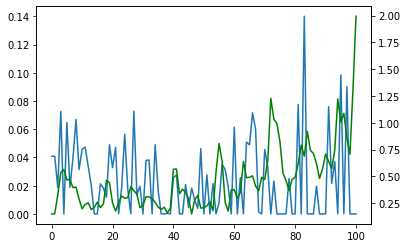

In [6]:
plt.plot(spread['Spread'])
plt.twinx()
plt.plot(spread['Sigma'], 'g')
# plt.plot(bars[['h','l']])
plt.show()

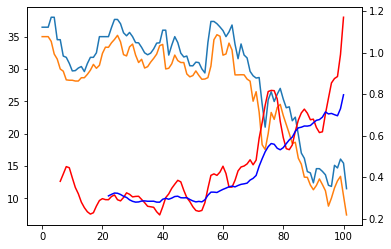

In [7]:
plt.plot(df)
plt.twinx()

plt.plot(spread['Sigma'].rolling(7).mean(), 'r')
plt.plot(spread['Sigma'].rolling(23).mean(), 'b')

plt.show()

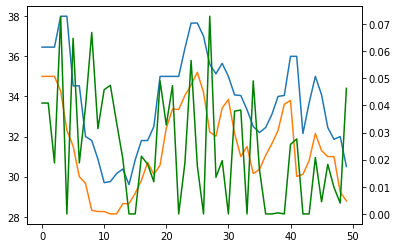

In [8]:
plt.plot(df[:50])
plt.twinx()
plt.plot(spread['Spread'][:50], 'g')
plt.show()

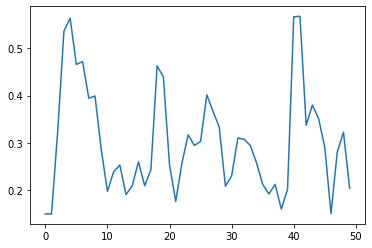

In [9]:
plt.plot(spread['Sigma'][:50])
plt.show()

In [10]:
from engine.trade_tester import getDailyVolatility

bars2 = bars.copy(deep=True)
bars2['ts'] = pd.to_datetime(bars2['t']*360*24, unit='s')
bars2.index = bars2['ts']

days, std = getDailyVolatility(bars2['c'], span0=20)

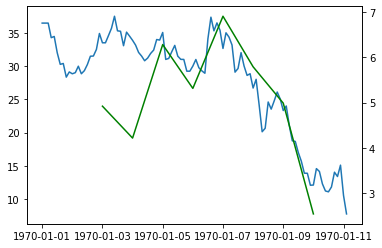

In [11]:
plt.plot(bars2['c'])
plt.twinx()
s = pow(std,0.5) * bars2.loc[std.index]['c']
plt.plot(s, 'g')
plt.show()

In [12]:
bars = GetBars(SYMBOL, resolution=1, sample_factor=1/60, bar_type='raw')
bars = bars.iloc[bars['t'].searchsorted(bars['t'].unique())]
bars.index = pd.to_datetime(bars['t'], unit='s')

In [13]:
bars.head()

finnhub_stock_candles_1_index                 created_at  \
t                                                                               
2021-01-13 16:04:00                       11990828 2021-11-28 19:53:39.075928   
2021-01-13 16:05:00                       11990829 2021-11-28 19:53:39.075928   
2021-01-13 16:06:00                       11990830 2021-11-28 19:53:39.075928   
2021-01-13 16:07:00                       11990831 2021-11-28 19:53:39.075928   
2021-01-13 16:08:00                       11990832 2021-11-28 19:53:39.075928   

                                    updated_at      c      h      l      o  \
t                                                                            
2021-01-13 16:04:00 2021-12-09 21:32:01.989785  36.46  36.46  35.00  35.00   
2021-01-13 16:05:00 2021-12-09 21:32:02.041646  34.27  38.00  34.27  36.25   
2021-01-13 16:06:00 2021-12-09 21:32:02.041646  34.45  34.53  32.31  34.00   
2021-01-13 16:07:00 2021-12-09 21:32:02.041646  32.00  34.53  31.53  34.50   
2021-01-13 16:08:00 2021-12-09 21:32:02.041646  30.84  32.20  30.84  32.00   

                      s           t       v symbol  imbalance_tick  imbalance  \
t                                                                               
2021-01-13 16:04:00  ok  1610553840  304941   MSGM               0        0.0   
2021-01-13 16:05:00  ok  1610553900   90604   MSGM              -1       -1.0   
2021-01-13 16:06:00  ok  1610553960  121715   MSGM               1        0.0   
2021-01-13 16:07:00  ok  1610554020   51293   MSGM              -1       -1.0   
2021-01-13 16:08:00  ok  1610554080   57639   MSGM              -1       -2.0   

                     imbalance_volume_weighted  
t                                               
2021-01-13 16:04:00                        0.0  
2021-01-13 16:05:00                   -90604.0  
2021-01-13 16:06:00                    31111.0  
2021-01-13 16:07:00                   -20182.0  
2021-01-13 16:08:00                   -77821.0

In [20]:
from engine.trade_tester import getDailyVolatilityHighLow

days, dv = getDailyVolatilityHighLow(bars[['h','l']], span0=16)

plt.plot(bars['c'][-200:])
plt.twinx()
dv = dv.rolling(16).mean()
s = dv.loc[days[-18:]]
plt.plot(s, 'g')
plt.show()